In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib
import os

In [2]:
df = pd.read_csv("salary_dataset.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [4]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [5]:
# checking for null values
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [6]:
df.shape

(6704, 6)

In [7]:
# as the null values are very less compared to the number of rows in the dataset: they can be dropped.
df.dropna(inplace=True)

In [8]:
df.shape

(6698, 6)

In [9]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [10]:
# checking for duplicates
df.duplicated().sum()

np.int64(4911)

In [11]:
duplicates = df[df.duplicated()]
duplicates.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


In [12]:
# dropping the duplicate rows
df = df.drop_duplicates()
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6623,43.0,Female,Master's Degree,Digital Marketing Manager,15.0,150000.0
6624,27.0,Male,High School,Sales Manager,2.0,40000.0
6625,33.0,Female,Bachelor's Degree,Director of Marketing,8.0,80000.0
6628,37.0,Male,Bachelor's Degree,Sales Director,7.0,90000.0


In [13]:
df.shape

(1787, 6)

In [14]:
print(df['Gender'].value_counts())
print("\n")
print(df['Education Level'].value_counts())
print("\n")
print(df['Job Title'].value_counts())

Gender
Male      966
Female    814
Other       7
Name: count, dtype: int64


Education Level
Bachelor's Degree    506
Master's Degree      446
PhD                  340
Bachelor's           262
Master's             122
High School          110
phD                    1
Name: count, dtype: int64


Job Title
Software Engineer Manager             127
Full Stack Engineer                   122
Senior Software Engineer               96
Senior Project Engineer                95
Back end Developer                     81
                                     ... 
Junior Research Scientist               1
Senior Product Development Manager      1
Junior Social Media Specialist          1
Social Media Man                        1
Delivery Driver                         1
Name: count, Length: 191, dtype: int64


In [15]:
# some job titles are rare: so changing them to 'Other'
threshold = 5
job_counts = df['Job Title'].value_counts()
rare_jobs = job_counts[job_counts < threshold].index

In [16]:
df['Job Title'] = df['Job Title'].apply(lambda x: x if x not in rare_jobs else 'Other')

In [17]:
df['Job Title'].value_counts()

Job Title
Other                               216
Software Engineer Manager           127
Full Stack Engineer                 122
Senior Software Engineer             96
Senior Project Engineer              95
Back end Developer                   81
Data Scientist                       80
Software Engineer                    78
Front end Developer                  71
Marketing Manager                    55
Product Manager                      53
Data Analyst                         51
Web Developer                        34
Financial Manager                    28
Director of HR                       27
Director of Marketing                27
Marketing Coordinator                26
Junior Sales Associate               25
Content Marketing Manager            24
Operations Manager                   22
Software Developer                   22
Junior HR Generalist                 21
Sales Manager                        20
Sales Representative                 20
Senior Product Marketing Manag

In [18]:
# Combining repeating values of education level

df['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"],inplace=True)
df['Education Level'].value_counts()

Education Level
Bachelor's     768
Master's       568
PhD            341
High School    110
Name: count, dtype: int64

EXPLORATORY DATA ANALYSIS

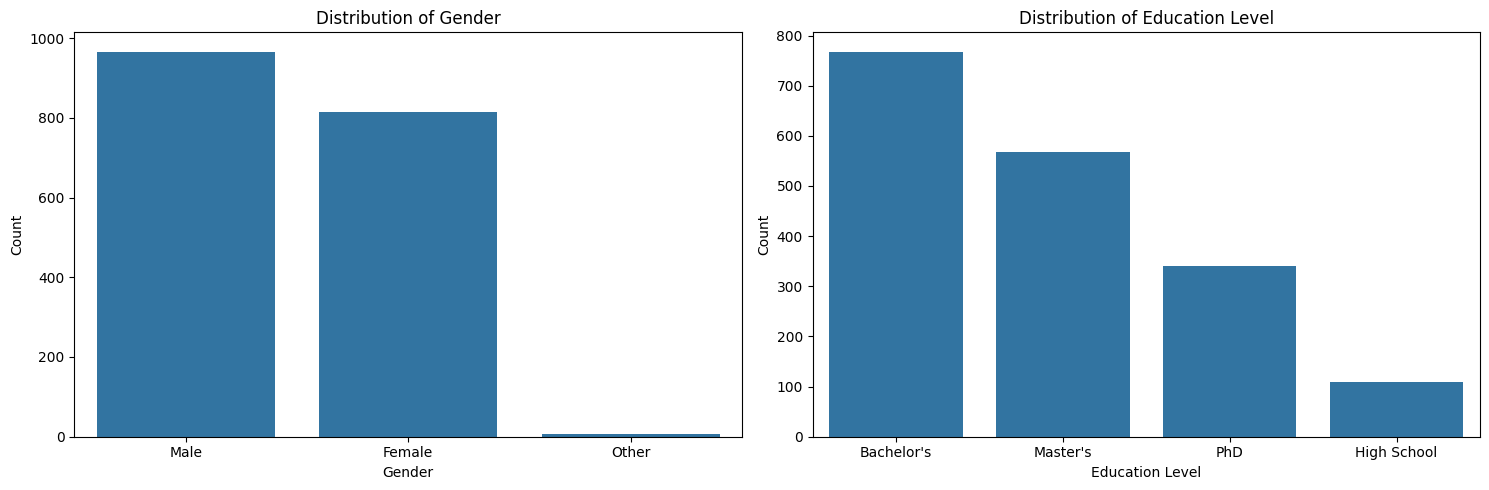

In [19]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the count of data points for each gender category in the first subplot
sns.countplot(x='Gender', data=df, ax=ax[0])

# Plot the count of data points for each education level category in the second subplot
sns.countplot(x='Education Level', data=df, ax=ax[1])

# Add labels and titles for the subplots
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Gender')

ax[1].set_xlabel('Education Level')
ax[1].set_ylabel('Count')
ax[1].set_title('Distribution of Education Level')

# Show the plots
plt.tight_layout()
plt.show()

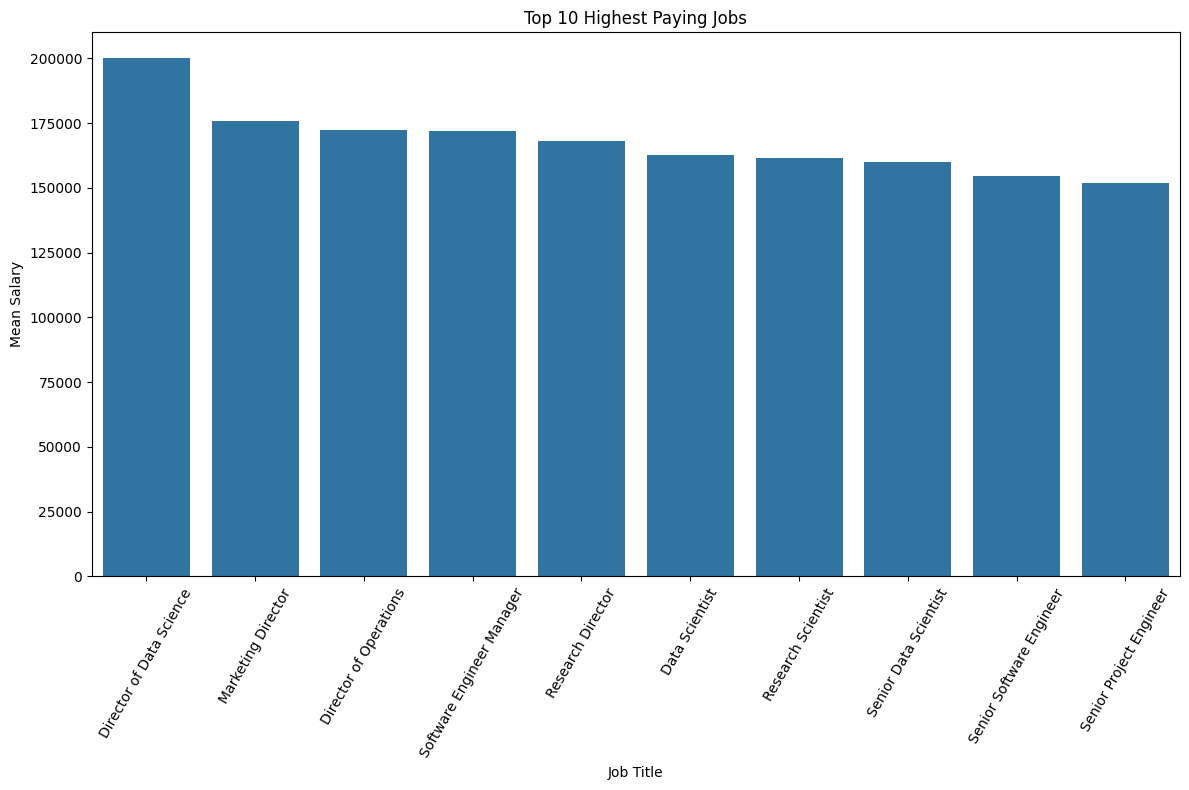

In [20]:
# Get the top 10 job titles with the highest mean salary
top_10_highest_paying_jobs = df.groupby('Job Title')['Salary'].mean().nlargest(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_highest_paying_jobs.index, y=top_10_highest_paying_jobs.values)

plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.title('Top 10 Highest Paying Jobs')
plt.xticks(rotation=60)

# Show the plot
plt.tight_layout()
plt.show()

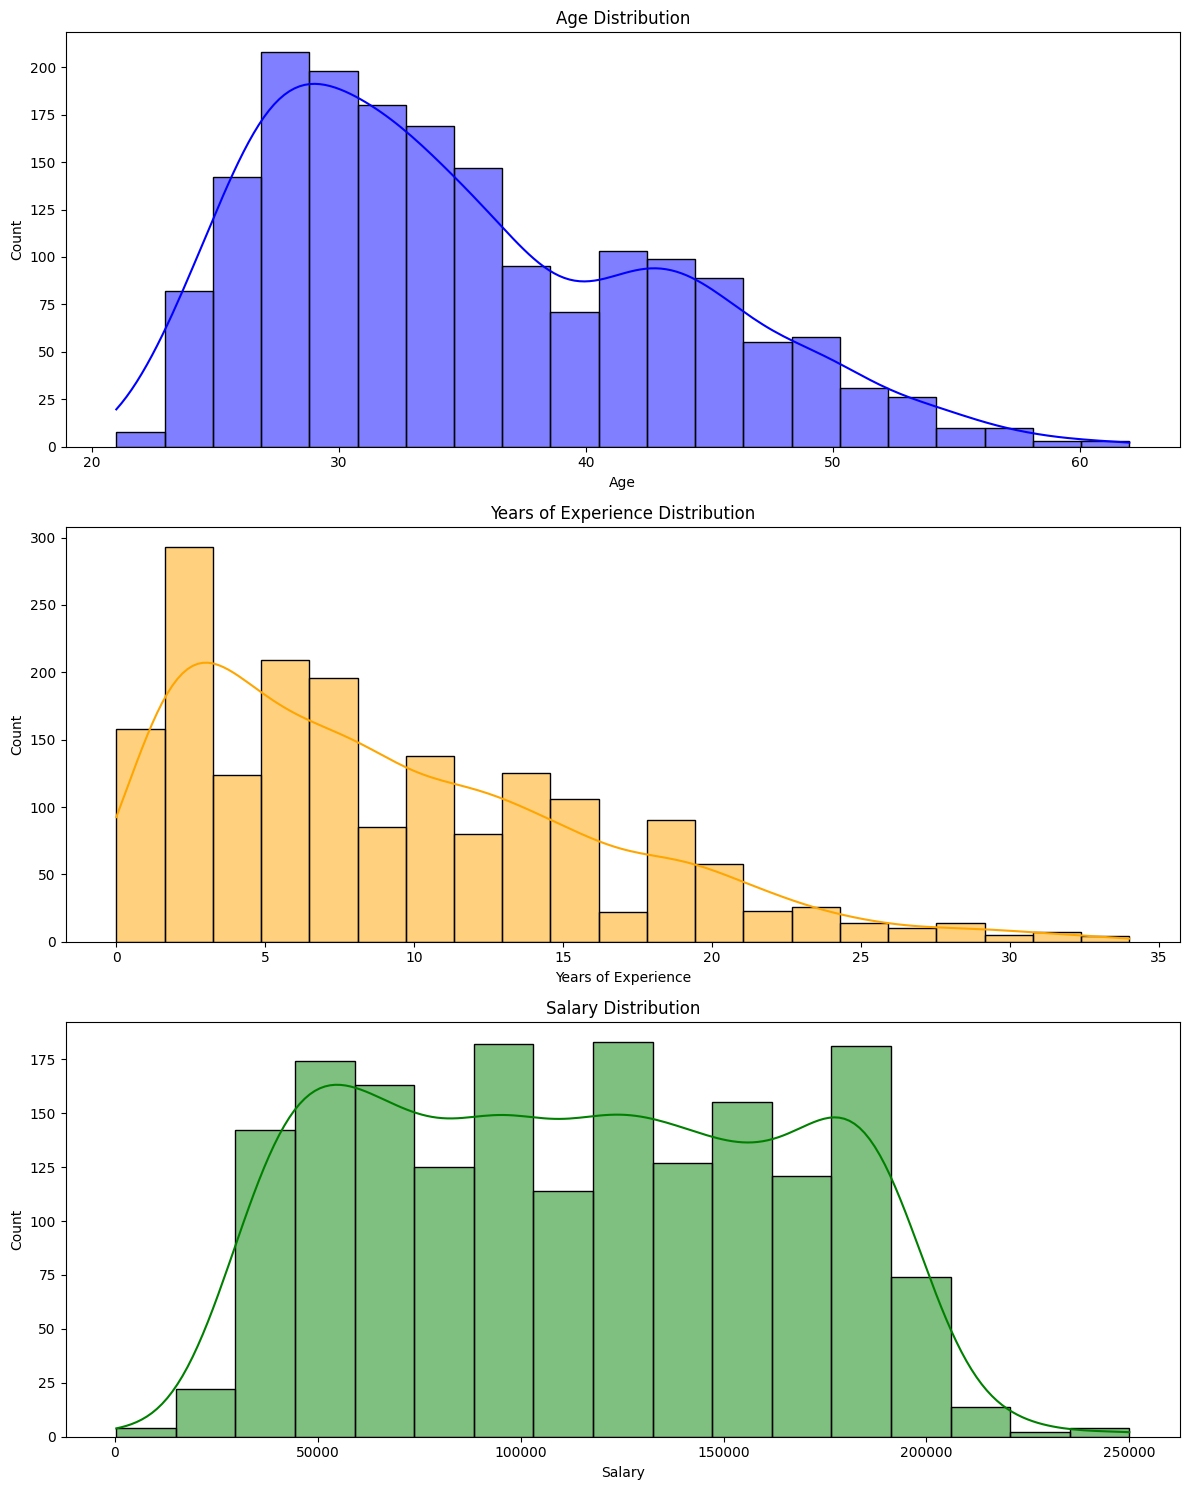

In [21]:
# Create a figure with three subplots
fig, ax = plt.subplots(3, 1, figsize=(12, 15))

# Create a histogram of Age in the first subplot
sns.histplot(df['Age'], ax=ax[0], color='blue', kde=True)
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age')

# Create a histogram of Years of Experience in the second subplot
sns.histplot(df['Years of Experience'], ax=ax[1], color='orange', kde=True)
ax[1].set_title('Years of Experience Distribution')
ax[1].set_xlabel('Years of Experience')

# Create a histogram of Salary in the third subplot
sns.histplot(df['Salary'], ax=ax[2], color='green', kde=True)
ax[2].set_title('Salary Distribution')
ax[2].set_xlabel('Salary')

plt.tight_layout()
plt.show()

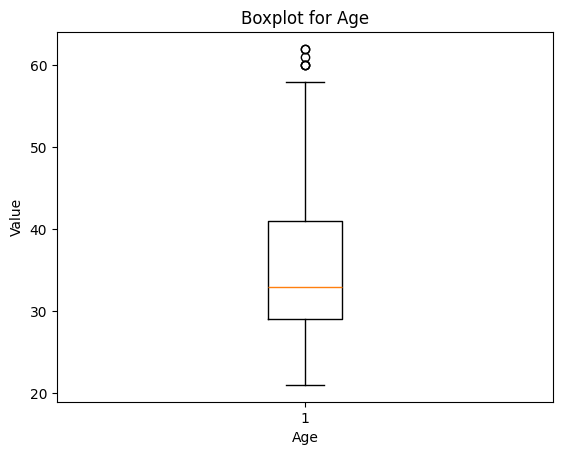

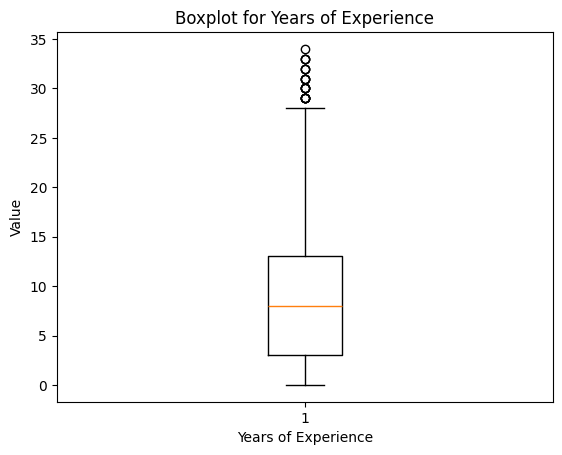

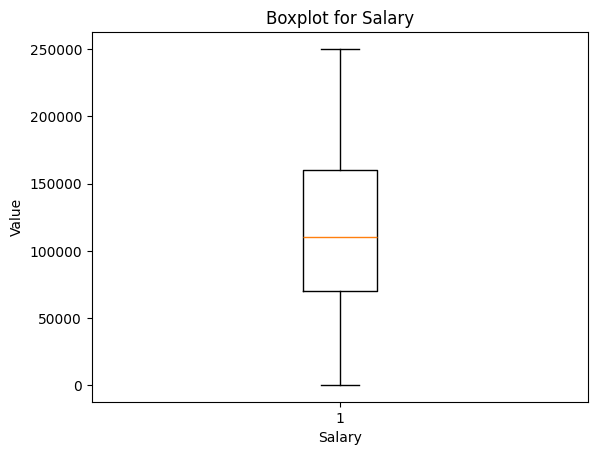

In [22]:
# boxplots for all the numerical columns
plt.boxplot(df['Age'])
plt.xlabel("Age")
plt.ylabel("Value")
plt.title("Boxplot for Age")
plt.show()

plt.boxplot(df['Years of Experience'])
plt.xlabel("Years of Experience")
plt.ylabel("Value")
plt.title("Boxplot for Years of Experience")
plt.show()

plt.boxplot(df['Salary'])
plt.xlabel("Salary")
plt.ylabel("Value")
plt.title("Boxplot for Salary")
plt.show()

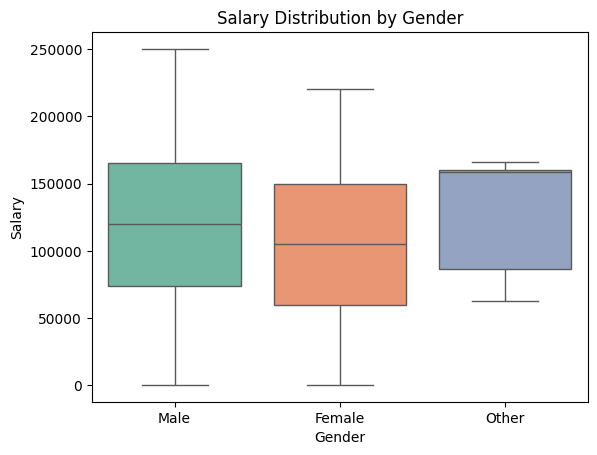

In [23]:
# Boxplot of Salary distribution across Gender
sns.boxplot(x='Gender', y='Salary', data=df, palette='Set2')

plt.xlabel('Gender')
plt.ylabel('Salary')
plt.title('Salary Distribution by Gender')
plt.show()

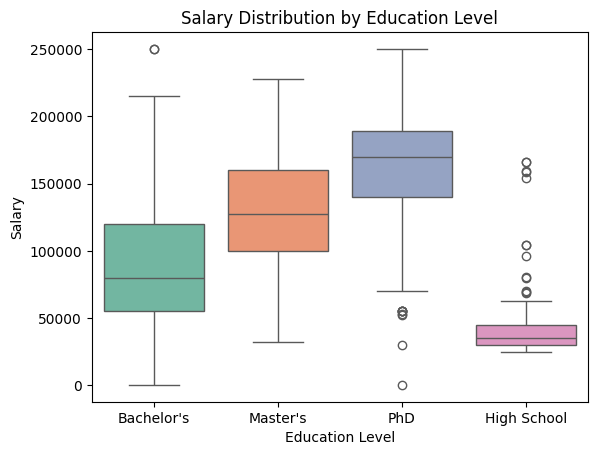

In [24]:
# Boxplot of Salary distribution across Education Level
sns.boxplot(x='Education Level', y='Salary', data=df, palette='Set2')

plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.title('Salary Distribution by Education Level')
plt.show()

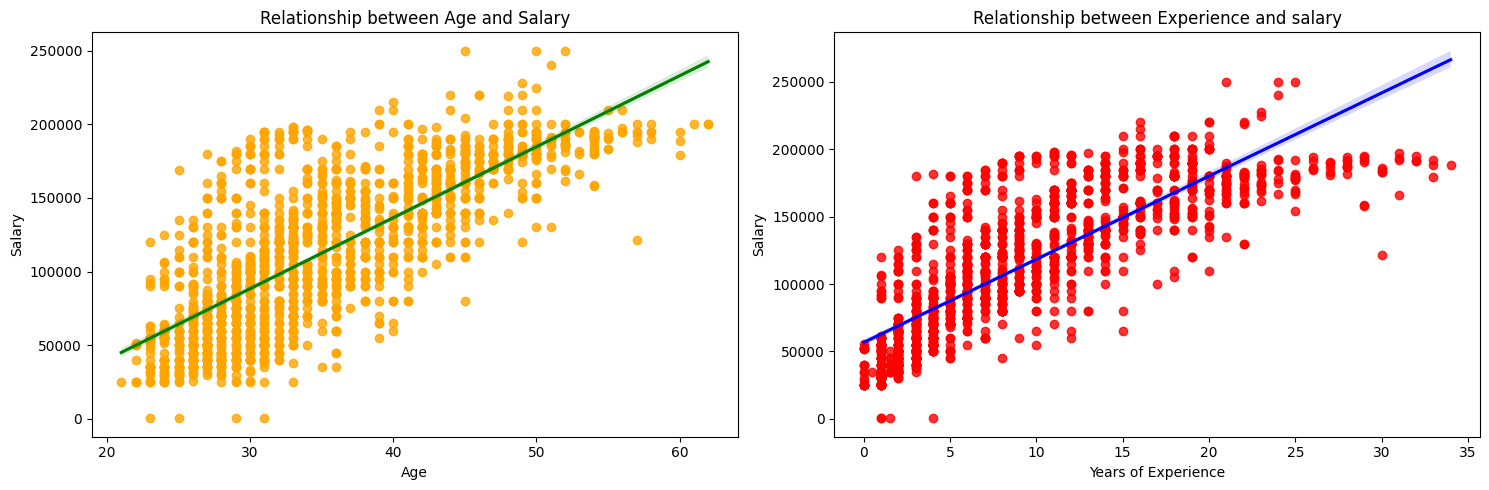

In [25]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot for relationship between age and salary
sns.regplot(x='Age',y='Salary',data=df, scatter_kws={'color':'orange'}, line_kws={'color':'green'}, ax=ax[0])
ax[0].set(title='Relationship between Age and Salary')

# Scatter plot for relationship between experience and salary
sns.regplot(x='Years of Experience',y='Salary',data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'}, ax=ax[1])
ax[1].set(title='Relationship between Experience and salary')

plt.tight_layout()
plt.show()

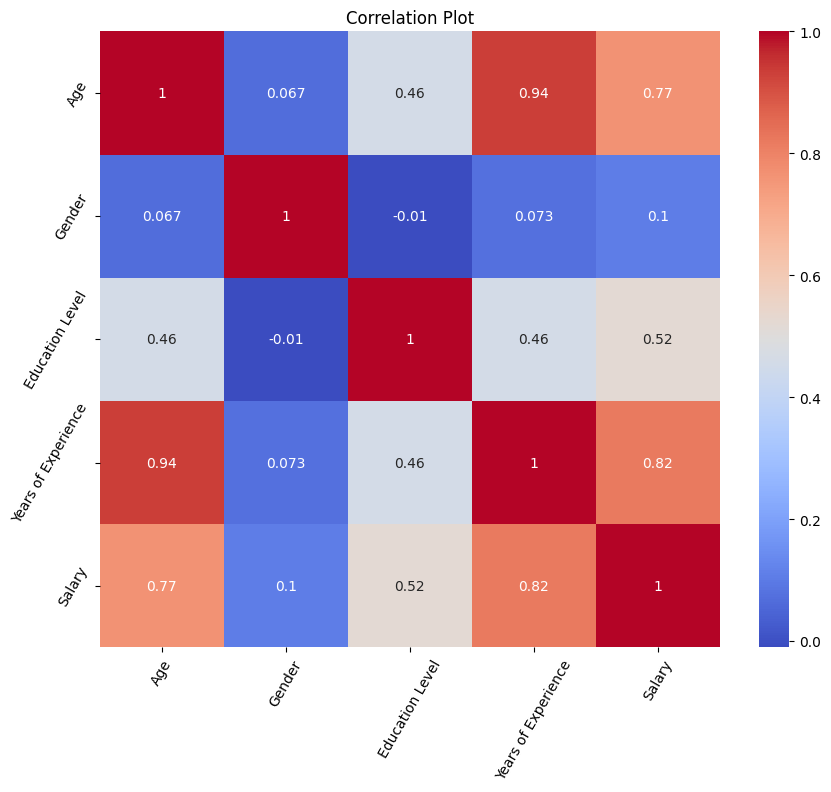

In [26]:
# Correlation matrix

# Label encoding the categorical variable
gender_le = LabelEncoder()
education_le = LabelEncoder()

df['Gender'] = gender_le.fit_transform(df['Gender'])
df['Education Level'] = education_le.fit_transform(df['Education Level'])

# Save the encoders
os.makedirs('encoders', exist_ok=True)
joblib.dump(gender_le, 'encoders/gender_encoder.pkl')
joblib.dump(education_le, 'encoders/education_encoder.pkl')

# Drop non-numeric column
df_corr = df.drop(columns=['Job Title'])

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.show()


In [27]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,Software Engineer,5.0,90000.0
1,28.0,0,2,Data Analyst,3.0,65000.0
2,45.0,1,3,Other,15.0,150000.0
3,36.0,0,0,Sales Associate,7.0,60000.0
4,52.0,1,2,Other,20.0,200000.0
...,...,...,...,...,...,...
6623,43.0,0,2,Digital Marketing Manager,15.0,150000.0
6624,27.0,1,1,Sales Manager,2.0,40000.0
6625,33.0,0,0,Director of Marketing,8.0,80000.0
6628,37.0,1,0,Sales Director,7.0,90000.0


In [28]:
# detecting the outliers in salary column using IQR method
Q1 = df.Salary.quantile(0.25) # First Quartile
Q3 = df.Salary.quantile(0.75) # Third Quartile

# Calculating Interquartile Range
IQR = Q3-Q1

# Detecting outliers lying 1.5x of IQR above and below Q1 and Q3 resp
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

In [29]:
df[df.Salary>upper]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [30]:
df[df.Salary<lower]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [31]:
# There are no outliers

# Convert categorical Job Title to numerical values

job_title_dummies = pd.get_dummies(df['Job Title'], prefix='', prefix_sep='', drop_first=False)

# Save job title column names for inference
job_title_columns = job_title_dummies.columns.tolist()
joblib.dump(job_title_columns, 'encoders/job_title_columns.pkl')

# Append the dummy columns to original DataFrame
df = pd.concat([df.drop('Job Title', axis=1), job_title_dummies], axis=1)

In [32]:
df.head()

,Age,Gender,Education Level,Years of Experience,Salary,Back end Developer,Content Marketing Manager,Data Analyst,Data Scientist,Digital Marketing Manager,...,Senior Product Manager,Senior Product Marketing Manager,Senior Project Engineer,Senior Project Manager,Senior Research Scientist,Senior Software Engineer,Software Developer,Software Engineer,Software Engineer Manager,Web Developer
0,32.0,1,0,5.0,90000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,28.0,0,2,3.0,65000.0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,45.0,1,3,15.0,150000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,36.0,0,0,7.0,60000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,52.0,1,2,20.0,200000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [33]:
df.dtypes

Age                          float64
Gender                         int64
Education Level                int64
Years of Experience          float64
Salary                       float64
                              ...   
Senior Software Engineer        bool
Software Developer              bool
Software Engineer               bool
Software Engineer Manager       bool
Web Developer                   bool
Length: 64, dtype: object

In [34]:
# Separating the dataset into features and target

# Dataset conntaining all features from df
features = df.drop('Salary',axis=1)

# Series containing target variable to be predicted
target = df['Salary']

In [35]:
# Splitting data into 80% training and 20% test sets

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

COMPARING DIFFERENT MODELS

In [36]:
# Define models and their hyperparameters
model_params = {
    'Linear_Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.01, 0.1, 1, 10, 100]
        }
    },
    'Lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [0.01, 0.1, 1, 10, 100]
        }
    },
    'Decision_Tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [2, 4, 6, 8, 10],
            'min_samples_split': [2, 5, 10],
            'random_state': [42]
        }
    },
    'Random_Forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100, 150],
            'max_depth': [None, 5, 10],
            'random_state': [42]
        }
    },
    'Gradient_Boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5],
            'random_state': [42]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'kernel': ['linear', 'rbf'],
            'C': [0.1, 1, 10],
            'epsilon': [0.01, 0.1, 0.5]
        }
    },
    'KNN': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    }
}

In [37]:
# Store results
scores_no_scaling = []
scores_with_scaling = []

# Define models that need scaling
needs_scaling = ['Ridge', 'Lasso', 'KNN', 'SVR']

for model_name, mp in model_params.items():
    model = mp['model']
    params = mp['params']

    # If the model needs scaling, use a Pipeline with StandardScaler
    if model_name in needs_scaling:
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])

        # Adjust param names to match pipeline syntax
        pipe_params = {f'model__{k}': v for k, v in params.items()}

        clf = GridSearchCV(pipe, pipe_params, cv=5, scoring='neg_mean_squared_error')
    else:
        clf = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')

    # Train model
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    # Compute metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    result = {
        'Model': model_name,
        'Best Params': clf.best_params_,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2
    }

    # Store in appropriate result list
    if model_name in needs_scaling:
        scores_with_scaling.append(result)
    else:
        scores_no_scaling.append(result)


In [38]:
# Convert to DataFrame
df_no_scaling = pd.DataFrame(scores_no_scaling).sort_values(by='RMSE')
df_with_scaling = pd.DataFrame(scores_with_scaling).sort_values(by='RMSE')

print("=== Models WITHOUT Scaling ===")
display(df_no_scaling)

print("\n=== Models WITH Scaling ===")
display(df_with_scaling)

# Combine both to find overall best
combined_df = pd.concat([df_no_scaling, df_with_scaling]).sort_values(by='RMSE')
print("\n=== All Models Combined (Sorted by RMSE) ===")
display(combined_df)

=== Models WITHOUT Scaling ===


,Model,Best Params,MSE,RMSE,MAE,R2 Score
3,Gradient_Boosting,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",2.589128e+08,16090.766590,10478.849663,0.905504
2,Random_Forest,"{'max_depth': None, 'n_estimators': 150, 'rand...",2.709721e+08,16461.229847,10402.156229,0.901103
1,Decision_Tree,"{'max_depth': 10, 'min_samples_split': 10, 'ra...",4.389352e+08,20950.780577,14032.325808,0.839801
0,Linear_Regression,{},5.298672e+08,23018.845441,16873.841254,0.806614



=== Models WITH Scaling ===


,Model,Best Params,MSE,RMSE,MAE,R2 Score
3,KNN,"{'model__n_neighbors': 3, 'model__weights': 'd...",4.059917e+08,20149.234712,12235.728706,0.851825
1,Lasso,{'model__alpha': 100},5.287495e+08,22994.552772,16806.879623,0.807022
0,Ridge,{'model__alpha': 10},5.292299e+08,23004.998368,16861.346750,0.806846
2,SVR,"{'model__C': 10, 'model__epsilon': 0.5, 'model...",1.071002e+09,32726.169279,27519.734253,0.609115



=== All Models Combined (Sorted by RMSE) ===


,Model,Best Params,MSE,RMSE,MAE,R2 Score
3,Gradient_Boosting,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",2.589128e+08,16090.766590,10478.849663,0.905504
2,Random_Forest,"{'max_depth': None, 'n_estimators': 150, 'rand...",2.709721e+08,16461.229847,10402.156229,0.901103
3,KNN,"{'model__n_neighbors': 3, 'model__weights': 'd...",4.059917e+08,20149.234712,12235.728706,0.851825
1,Decision_Tree,"{'max_depth': 10, 'min_samples_split': 10, 'ra...",4.389352e+08,20950.780577,14032.325808,0.839801
1,Lasso,{'model__alpha': 100},5.287495e+08,22994.552772,16806.879623,0.807022
0,Ridge,{'model__alpha': 10},5.292299e+08,23004.998368,16861.346750,0.806846
0,Linear_Regression,{},5.298672e+08,23018.845441,16873.841254,0.806614
2,SVR,"{'model__C': 10, 'model__epsilon': 0.5, 'model...",1.071002e+09,32726.169279,27519.734253,0.609115


In [39]:
# ------ Best model: gradient boosting regressor ------

best_gb_model = GradientBoostingRegressor(
    learning_rate=0.2, max_depth=5, n_estimators=150
)
best_gb_model.fit(x_train, y_train)


,loss,'squared_error'
,learning_rate,0.2
,n_estimators,150
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,5
,min_impurity_decrease,0.0
,init,None


In [40]:
y_pred = best_gb_model.predict(x_test)

# Compute metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("GradientBoostingRegressor")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

GradientBoostingRegressor
Mean Squared Error: 265875092.7097591
Root Mean Squared Error: 16305.676701988148
Mean Absolute Error: 10312.51841225758
R2 Score: 0.9029631806146388


In [41]:
# ------ Saving the model ------

joblib.dump(best_gb_model, 'best_gradient_boosting_model.pkl')
print("Model saved as 'best_gradient_boosting_model.pkl'")

Model saved as 'best_gradient_boosting_model.pkl'


In [42]:
feature_names = x_train.columns.tolist()
joblib.dump(feature_names, 'encoders/feature_names.pkl')
joblib.dump(job_title_dummies.columns.tolist(), 'encoders/job_title_columns.pkl')

print(f"Saved feature names: {len(feature_names)} features")
print("Feature order:", feature_names[:10], "..." if len(feature_names) > 10 else "")

Saved feature names: 63 features
Feature order: ['Age', 'Gender', 'Education Level', 'Years of Experience', 'Back end Developer', 'Content Marketing Manager', 'Data Analyst', 'Data Scientist', 'Digital Marketing Manager', 'Director of Data Science'] ...
